### play around with data

In [1]:
import numpy as np
from config import *
import librosa
import os
import matplotlib.pyplot as plt

In [2]:
def features(file_path):
    """extract mfcc, first and second derivative features from an audio file

    args:
        file_path: path to audio file

    returns:
        mfcc, delta1, delta2
    """
    # load audio file
    audio, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    # ensure consistent length
    if len(audio) > MAX_LENGTH:
        audio = audio[:MAX_LENGTH]
    else:
        audio = np.pad(audio, (0, MAX_LENGTH - len(audio)))

    # extract mfcc features
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)

    # add delta features (first and second derivatives)
    delta1 = librosa.feature.delta(mfcc, order=1)
    delta2 = librosa.feature.delta(mfcc, order=2)

    return mfcc, delta1, delta2

### angry, fearful, sad, and neutral - an analysis

In [18]:
tests = ['disgusted/', 'neutral/', 'sad/', 'angry/']
files = []

# get 4 samples of audio files with diff emotions
path = 'data/dataset/'
for i in tests: 
    for f in os.listdir(path + i):
        files.append(path + i + f)
        break

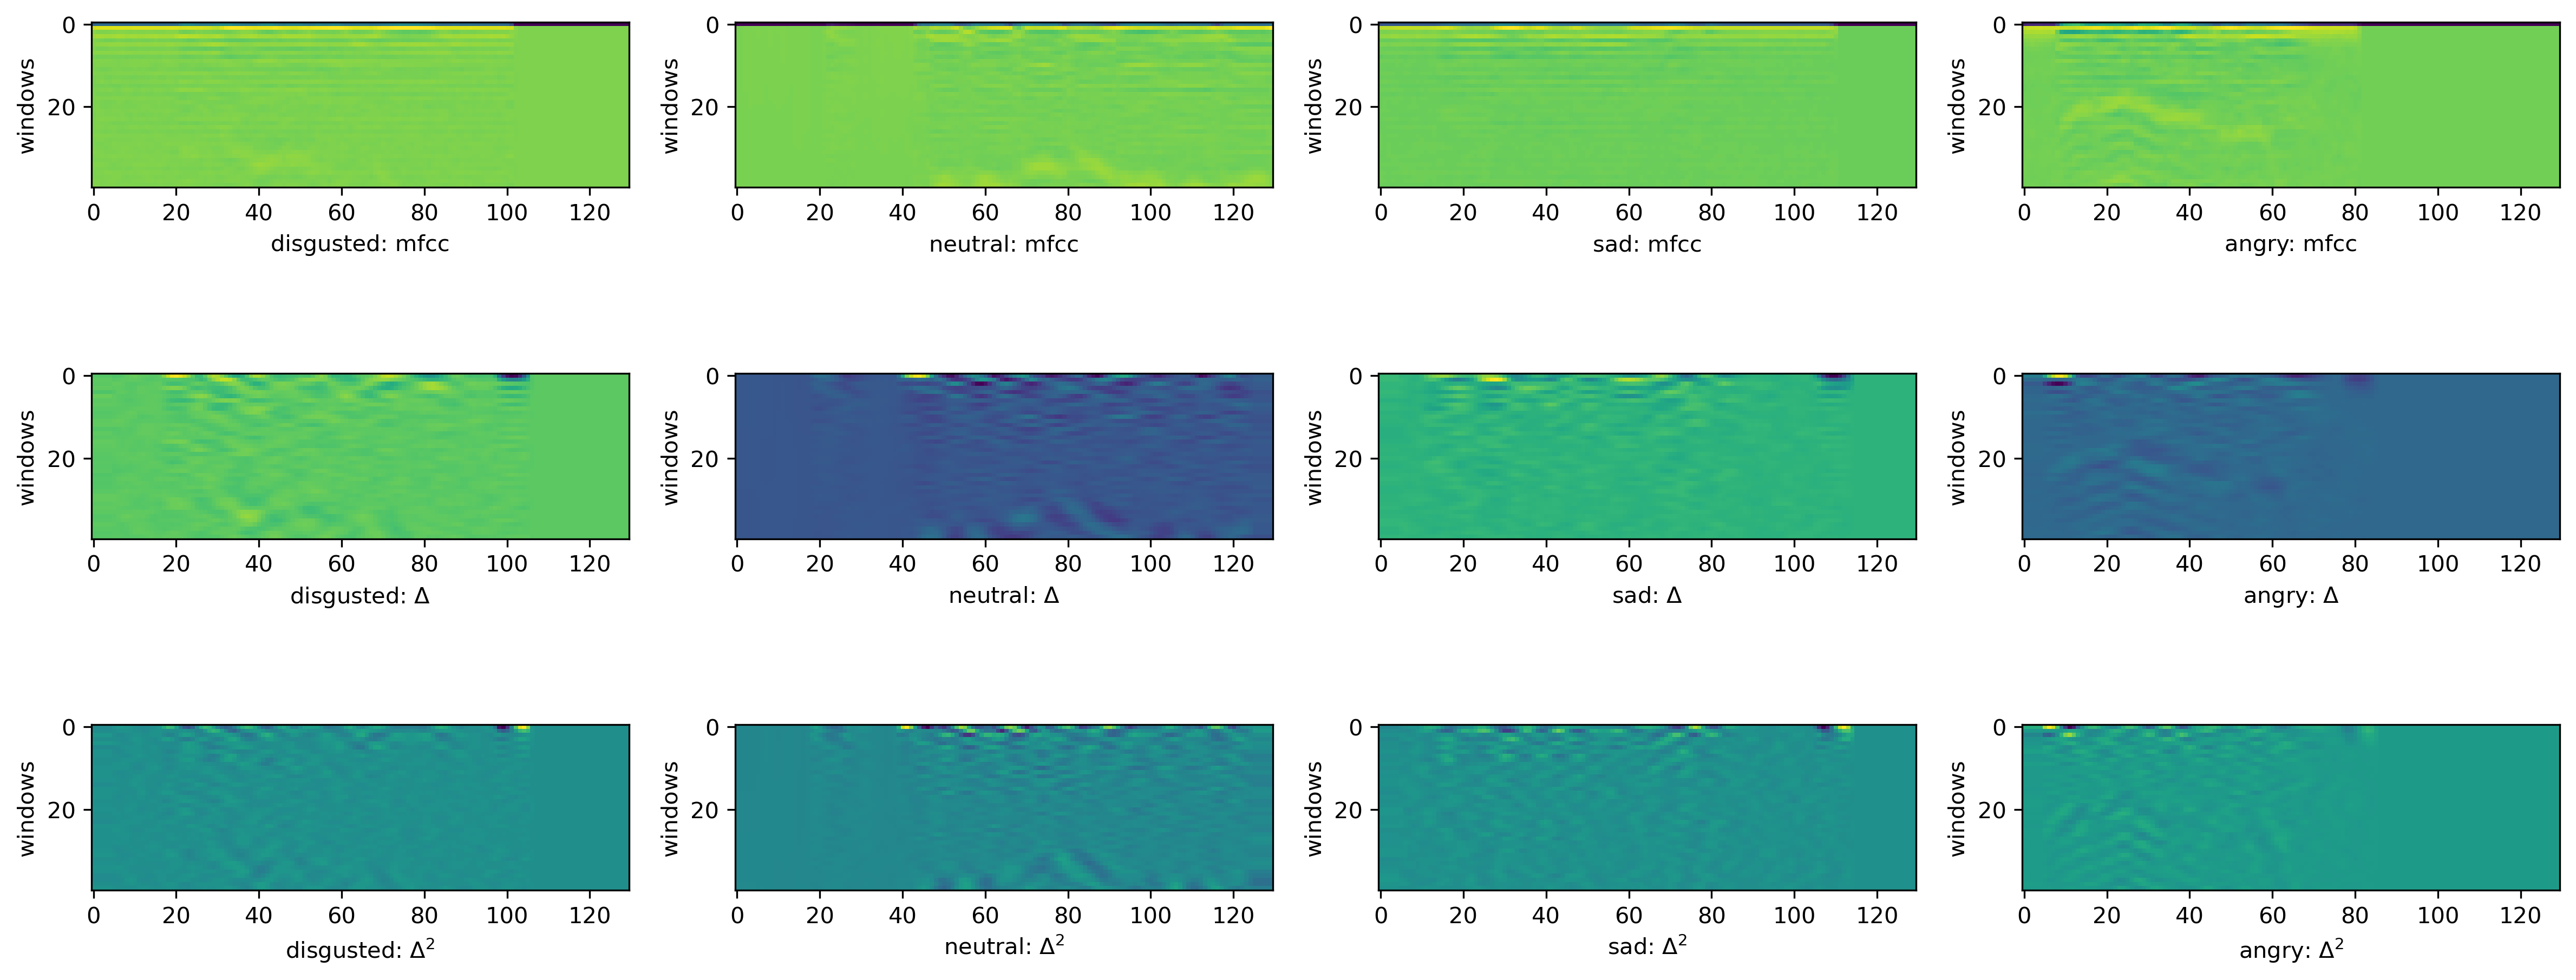

In [19]:
plt.figure(figsize=(16, 7), dpi=300)

for i in range(4):
    mfcc, d1, d2 = features(files[i])

    plt.subplot(3, 4, i+1)
    plt.imshow(mfcc)
    plt.xlabel(tests[i][:-1] + ': mfcc')
    plt.ylabel('windows')

    plt.subplot(3, 4, i+5)
    plt.imshow(d1)
    plt.xlabel(tests[i][:-1] + r': $\Delta$')
    plt.ylabel('windows')

    plt.subplot(3, 4, i+9)
    plt.imshow(d2)
    plt.xlabel(tests[i][:-1] + r': $\Delta^2$')
    plt.ylabel('windows')

plt.tight_layout()
plt.show()